<h1>Part 1: Load required modules </h1>

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

<h1>Part 2: Load training and test data to dataframe</h1>
<ul>
    <li>As there are column names "-", which is not good symbole for Panda dataframe, lets rename them</li>
    <li>By analysing data, we see "?" symbole, lets change it to "Null"</li>
    <li>Lets check for Null in each features, using isnull()</li>
</ul>

In [29]:
df = pd.read_csv('/Users/vmohanam/Documents/uwf/2024 Spring/Machine Learning for DS - 16691/adult-income-classification/train.csv')
dft = pd.read_csv('/Users/vmohanam/Documents/uwf/2024 Spring/Machine Learning for DS - 16691/adult-income-classification/test.csv')

# check for data
df.head()

#lets rename columns with sysmbol to comply with panda
df = df.rename(columns = {'educational-num' : 'educationalEnum'})
df = df.rename(columns = {'marital-status' : 'maritalStatus'})
df = df.rename(columns = {'hours-per-week' : 'hoursPerWeek'})
df = df.rename(columns = {'native-country' : 'nativeCountry'})
df = df.rename(columns = {'capital-gain' : 'capitalGain'})
df = df.rename(columns = {'capital-loss' : 'capitalLoss'})

dft = dft.rename(columns = {'educational-num' : 'educationalEnum'})
dft = dft.rename(columns = {'marital-status' : 'maritalStatus'})
dft = dft.rename(columns = {'hours-per-week' : 'hoursPerWeek'})
dft = dft.rename(columns = {'native-country' : 'nativeCountry'})
dft = dft.rename(columns = {'capital-gain' : 'capitalGain'})
dft = dft.rename(columns = {'capital-loss' : 'capitalLoss'})

#Lets handle "?"
df.replace(['?'],[np.nan], inplace=True)
dft.replace(['?'],[np.nan], inplace=True)

#chaeck for nulls
df.isnull().sum()
dft.isnull().sum()

#df.describe()

age                   0
workclass          2230
fnlwgt                0
education             0
educationalEnum       0
maritalStatus         0
occupation         2238
relationship          0
race                  0
gender                0
capitalGain           0
capitalLoss           0
hoursPerWeek          0
nativeCountry       687
income                0
id                    0
dtype: int64

<h4>Lets analyse unique values in each features for continous and categorical data</h4>
Any features less than 50 unique can be considred as categorical features

In [68]:

#Examin unique values in each features - for continous and categorical features
n = df.nunique(axis=0)
print("Unique values in each column :\n", n)



Unique values in each column :
 id                 39073
income                 2
age                   74
workclass              8
educationalEnum       16
maritalStatus          7
occupation            14
relationship           6
race                   5
gender                 2
hoursPerWeek          95
nativeCountry         41
capitalGain          122
capitalLoss           94
dtype: int64


<h4>Select required features, as we have education and educationEnum, we can ignore education and fnlwgt, as we ML will get a weight score</h4>

In [31]:
# feature selection 
train_columns = ['id','income','age','workclass','educationalEnum','maritalStatus','occupation','relationship','race','gender','hoursPerWeek','nativeCountry','capitalGain','capitalLoss']
df = pd.DataFrame(df, columns=train_columns)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39073 entries, 0 to 39072
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               39073 non-null  int64 
 1   income           39073 non-null  int64 
 2   age              39073 non-null  int64 
 3   workclass        36843 non-null  object
 4   educationalEnum  39073 non-null  int64 
 5   maritalStatus    39073 non-null  object
 6   occupation       36835 non-null  object
 7   relationship     39073 non-null  object
 8   race             39073 non-null  object
 9   gender           39073 non-null  object
 10  hoursPerWeek     39073 non-null  int64 
 11  nativeCountry    38386 non-null  object
 12  capitalGain      39073 non-null  int64 
 13  capitalLoss      39073 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 4.2+ MB


<h4>Check data for distribution and outlier</h4>

In [57]:
# Check data for distribution and outlier
#df.workclass.value_counts()

#plt.hist(df.workclass)
#plt.show()

<h4>Check data for distribution and outlier</h4>

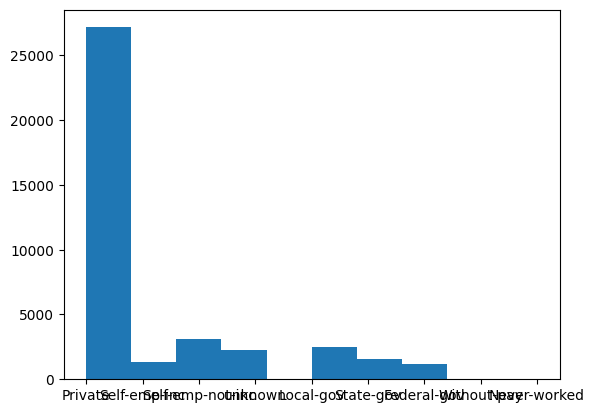

In [58]:
# Check data for distribution and outlier

df.workclass.value_counts().sort_values

plt.hist(df.workclass.replace([np.nan],['unknown']))
plt.show()

<h4>Check data for distribution and outlier</h4>

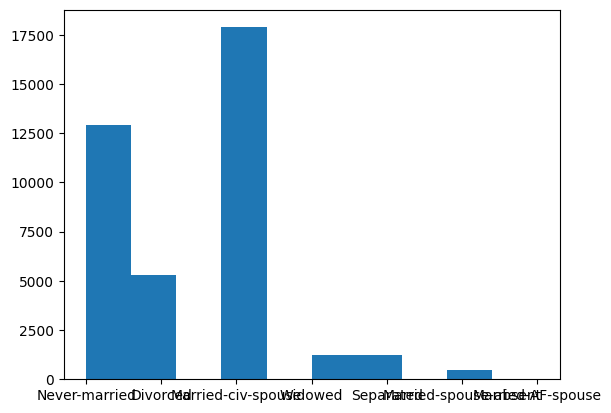

In [59]:
# Check data for distribution and outlier

df.maritalStatus.value_counts()
plt.hist(df.maritalStatus)
plt.show()


<h4>Check data for distribution and outlier</h4>

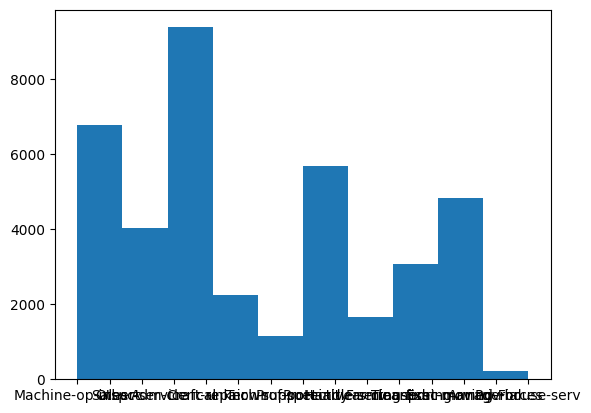

In [60]:
# Check data for distribution and outlier
df.occupation.value_counts()

plt.hist(df.occupation.replace([np.nan],['unknown']))
plt.show()

<h4>Check data for distribution and outlier</h4>

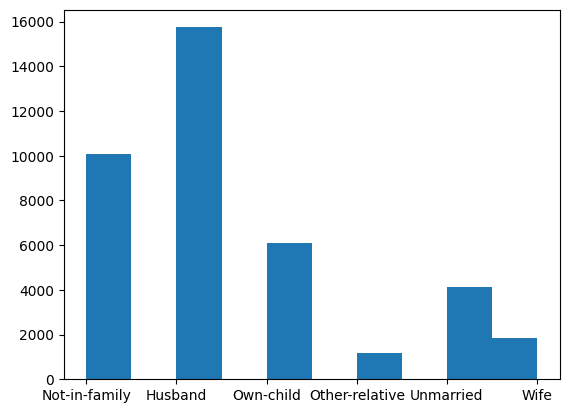

In [61]:
# Check data for distribution and outlier
df.relationship.value_counts()

plt.hist(df.relationship)
plt.show()

<h4>Check data for distribution and outlier</h4>

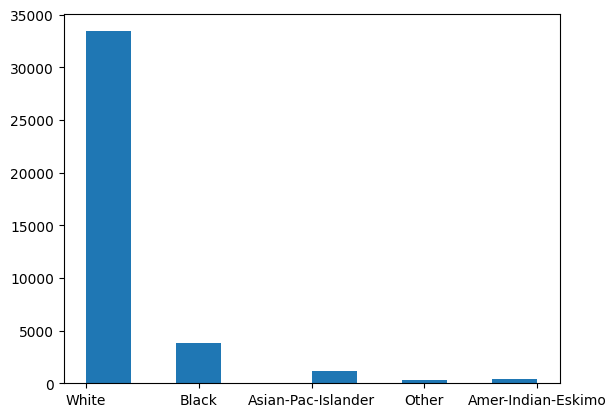

In [62]:
# Check data for distribution and outlier
df.race.value_counts()

plt.hist(df.race)
plt.show()

<h4>Check data for distribution and outlier</h4>

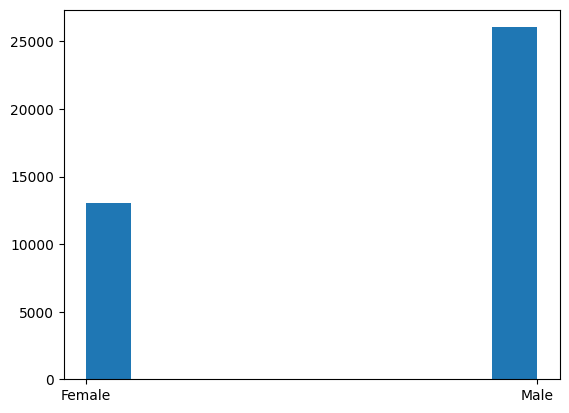

In [63]:
# Check data for distribution and outlier
df.gender.value_counts()

plt.hist(df.gender)
plt.show()

<h4>Check data for distribution and outlier</h4>

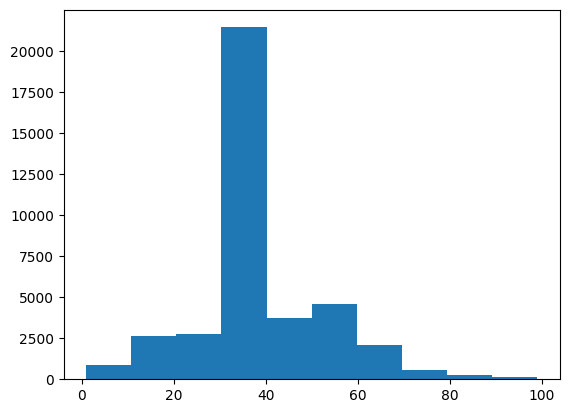

In [64]:
# Check data for distribution and outlier
df.hoursPerWeek.value_counts()

plt.hist(df.hoursPerWeek)
plt.show()

<h4>Check data for distribution and outlier</h4>

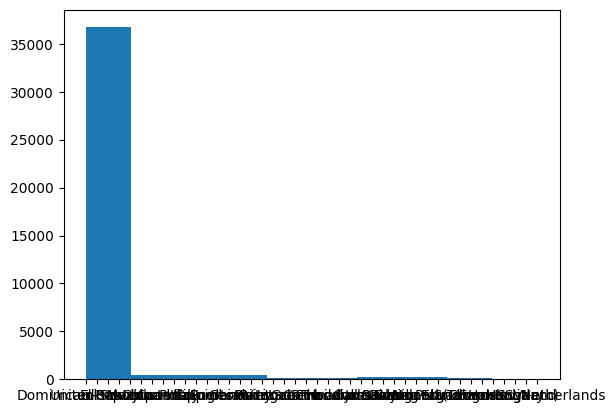

In [65]:
# Check data for distribution and outlier
plt.hist(df.nativeCountry.replace([np.nan],['unknown']))
plt.show()

<h4>Check data for distribution and outlier</h4>

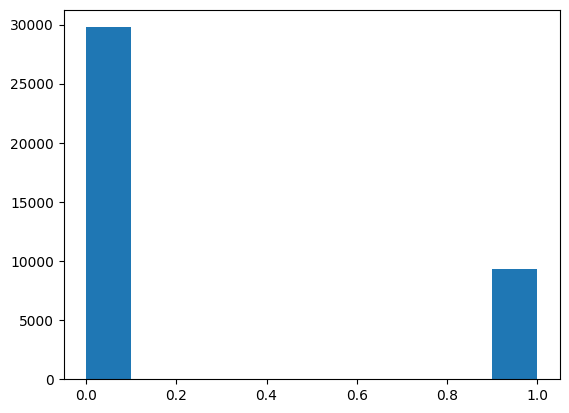

In [66]:
# Check data for distribution and outlier
df.income.value_counts()

plt.hist(df.income)
plt.show()

## Feature engineering for training and validation sets
Scaling your features can help improve training the model in this case since all the features are numerical, so scaling should be sufficient. Of course, you may try different feature engineering methods. <br>
Lets apply One-Hot Encoding on multiple columns for categorical features

## Splitting dataset to training and validation sets
Splitting the training data to obtain training set and validation set, both include features (X) and labels (y). Here, the labels (y) are the ground truth labels.

In [42]:
#One-Hot Encoding Multiple Columns
df_train = pd.get_dummies(data = df, columns=['workclass','maritalStatus','occupation','relationship','race','gender','nativeCountry'], drop_first=True, dummy_na=True) #

#split data for train and test
trainRaw, testRaw = df_train.iloc[:, 2:].values, df.iloc[:, 1:2].values
Train, Test, Tr_lable, Te_lable = train_test_split(trainRaw,testRaw,test_size=0.2,random_state=10,stratify=testRaw)

sc=StandardScaler()

sc.fit(Train) 
# scale the training dataset
TrainStd=sc.transform(Train) 
# scale the testing dataset
TestStd=sc.transform(Test) 


## Perceptron ##
Perceptron Accuracy: 0.817

In [43]:
# Explore perception model
ppn=Perceptron(eta0=1, random_state=10) #Default everything except random state
# train the model
ppn.fit(TrainStd, Tr_lable.ravel())

# Predict on test data
p_Pred=ppn.predict(TestStd)
# calculate the accuracy 
p_acc=accuracy_score(Te_lable,p_Pred)
# display accuracy
print('Perceptron Accuracy: %.3f' % p_acc) 

Perceptron Accuracy: 0.817


## LogisticRegression ##
LogisticRegression Accuracy: 0.856

In [44]:
# Explore LogisticRegression model
lr = LogisticRegression(solver = 'lbfgs', multi_class='auto',random_state=10, max_iter=50, penalty='l2')
# train the model
lr.fit(TrainStd, Tr_lable.ravel())

# Predict on test data
lr_Pred=lr.predict(TestStd)
# calculate the accuracy 
lr_acc=accuracy_score(Te_lable,lr_Pred)
# display accuracy
print('LogisticRegression Accuracy: %.3f' % lr_acc) 

LogisticRegression Accuracy: 0.856


## SVM ##
SVM Accuracy: 0.853

In [45]:
# Explore SVM model
from sklearn import svm
mo = svm.SVC()
# train the model
mo.fit(TrainStd, Tr_lable.ravel())

# Predict on test data
mo_Pred=mo.predict(TestStd)
# calculate the accuracy 
mo_acc=accuracy_score(Te_lable,mo_Pred)
# display accuracy
print('SVM Accuracy: %.3f' % mo_acc) 

SVM Accuracy: 0.853


## DecisionTreeClassifier ##
DecisionTreeClassifier Accuracy: 0.845

In [46]:
# Explore DecisionTreeClassifier model
dt = DecisionTreeClassifier(criterion="entropy", random_state=4, max_depth=4, min_samples_leaf=5)
# train the model
dt.fit(TrainStd, Tr_lable.ravel())

# Predict on test data
dt_Pred=dt.predict(TestStd)
# calculate the accuracy 
dt_acc=accuracy_score(Te_lable,dt_Pred)
# display accuracy
print('DecisionTreeClassifier Accuracy: %.3f' % dt_acc) 

DecisionTreeClassifier Accuracy: 0.845


## KNeighborsClassifier ##
KNeighborsClassifier Accuracy: 0.824

In [47]:
# Explore KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=5, weights="distance",algorithm="auto", leaf_size=30, p=1) 
# train the model
knn.fit(TrainStd, Tr_lable.ravel())

# Predict on test data
knn_Pred=knn.predict(TestStd)
# calculate the accuracy 
knn_acc=accuracy_score(Te_lable,knn_Pred)
# display accuracy
print('KNeighborsClassifier Accuracy: %.3f' % knn_acc) 

KNeighborsClassifier Accuracy: 0.824


## RandomForestClassifier ##
RandomForestClassifier Accuracy: 0.849

In [48]:
# Explore RandomForestClassifier model
rf = RandomForestClassifier(criterion="entropy",max_depth=9, random_state=10, max_leaf_nodes=15)
# train the model
rf.fit(TrainStd, Tr_lable.ravel())

# Predict on test data
rf_Pred=rf.predict(TestStd)
# calculate the accuracy 
rf_acc=accuracy_score(Te_lable,rf_Pred)
# display accuracy
print('RandomForestClassifier Accuracy: %.3f' % rf_acc) 

RandomForestClassifier Accuracy: 0.849


## Part 3: Test data ##
## Loading and preprocessing the test data
**Test data** (`test.csv`) contains the features but no labels. We aim to predict the labels by feeding the features to the trained model. 

In [49]:
test_columns = ['id','age','workclass','educationalEnum','maritalStatus','occupation','relationship','race','gender','hoursPerWeek','nativeCountry','capitalGain','capitalLoss']
dft = pd.DataFrame(dft, columns=test_columns)

df_test = pd.get_dummies(data = dft, columns=['workclass','maritalStatus','occupation','relationship','race','gender','nativeCountry'], drop_first=True, dummy_na=True)
df_test.insert(62,'nativeCountry_Holand-Netherlands',False)

testSub = df_test.iloc[:, 1:].values

sc=StandardScaler()
#scale test dataset
sc.fit(testSub) 
TestSubStd=sc.transform(testSub) #This is now a numpy array


### As LogisticRegression showed high accuracy, let apply it on test/unseen dataset

In [51]:
# Explore LogisticRegression model
lr = LogisticRegression(solver = 'lbfgs', multi_class='auto',random_state=10, max_iter=100)
# train the model
lr.fit(TrainStd, Tr_lable.ravel())

# Predict on test data
lr_Pred=lr.predict(TestSubStd)

#print the result for submission
i = 0
for idx in dft.index:
    print(str(dft.iloc[idx, 0])+","+str(lr_Pred[i]))
    i=i+1

392,0
1900,0
24507,0
32817,1
47893,0
21562,0
809,0
19597,0
932,1
29560,0
39439,1
31204,0
34680,0
5373,0
31851,0
31466,0
31460,0
38144,1
15231,0
27312,0
25562,0
29828,0
16407,1
45845,0
38651,1
25135,0
27911,0
6804,0
44524,0
21274,0
21298,0
2059,0
29063,0
39767,0
678,0
25646,0
26536,0
33586,0
42114,0
37213,1
13091,0
23698,1
36981,1
39021,1
11583,0
41010,0
37401,0
4374,0
7944,0
47707,1
45800,0
18215,0
34852,0
13942,0
8647,0
37134,0
3908,1
29462,0
24132,0
15235,0
23917,0
15830,0
7936,0
1405,0
42830,0
18680,0
86,0
22864,0
10029,0
38786,0
42758,1
4035,0
16562,0
17473,0
5101,0
17655,1
48170,0
31412,0
47029,0
6218,0
33802,0
11514,0
20914,0
17646,0
833,0
43331,1
19498,0
26496,0
32701,0
48101,1
16284,0
20277,0
36377,1
32870,1
12749,0
32210,0
47399,0
2620,0
21754,0
6165,1
12997,0
10651,0
3627,0
38014,0
42362,0
29405,1
531,0
28621,0
6569,0
18868,0
47895,1
10169,0
17015,0
40248,0
36559,0
10379,0
44462,0
845,0
43204,0
45253,0
19385,0
47172,1
36291,0
5046,0
5194,0
7315,1
35045,1
9239,0
10006,0
3416,0